In [1]:
import numpy as np
from matplotlib import pyplot

## Objective Function

We use the Ackley's Test Function, frequently used for optimization problems:

$$\text{ackley}(x,y) = -a \cdot \exp \left({-b \cdot \sqrt{\frac{1}{2} (x^2 + y^2)}} \right) - \exp\left({\frac{1}{2}  (\cos(c x) + \cos(c y))}\right) + \exp(1) + a$$

This 2-variables-function has its best global in x = 0, where f(0) = 0.

In [2]:
def ackley_function(v):
    x, y = v
# Typical Parameters
    a = 20
    b = 0.2
    c = 2 * np.pi

    return -a * np.exp(-b * np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5 * (np.cos(c*x) + np.cos(c*y))) + np.e + a

### Visualization with MatplotLib

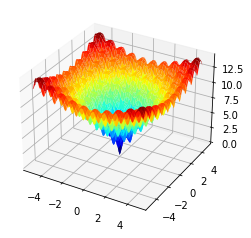

In [3]:
# Observation Interval for Input
r_min, r_max = -5.0, 5.0

# Uniform Sampling for Input's Observation Interval, with steps of 0.1 
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xaxis, yaxis)

# Objective Functions' Values
v = x, y
results = ackley_function(v)
 
# Surface Plot
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet');

# FIRST-CHOICE HILL CLIMBING

In [4]:
def in_bounds(point, bounds):
# For Each Dimension...
    for d in range(len(bounds)):
# ... it's verified if the dimension exceeds its bound
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
            return False
    return True

In [5]:
def first_choice_hill_climbing_with_scores(ackley_function, bounds, n_iterations, step_size):
# Generation of a Random Starting State...which has to respect the bounds
    current = None
    
    while current is None or not in_bounds(current, bounds):
        current = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# Observations:
    # - bounds[:, 0] -> Lower Bound of the imposed observation interval: "5" for the default execution.
    # - np.random.rand(n) -> creates an array of the given shape and populates it with random samples from a Uniform Distribution over [0,1).
    # - (bounds[:, 1] - bounds[:, 0]) -> Dimension of the imposed observation interval -> "10" for the default execution.
    # - type(current) == numpy.ndarray
    # - current.shape == (2,)

    current_eval = ackley_function(current)

# Scores Memory
    scores = list()
    scores.append(current_eval)

# Hill Climbing execution
    for i in range(n_iterations):
        next = None

        while next is None or not in_bounds(next, bounds):
            next = current + np.random.randn(len(bounds)) * step_size
# Observations:
    # - len(bounds) == 1
    # - np.random.randn(d0, d1, ..., dn) -> returns an array of the given shape and populated with samples from a Standard Normal Distribution
    # - step_size -> Standard Normal Distribution's Standard Deviation
        
        next_eval = ackley_function(next)

        if next_eval <= current_eval:
            print("Improvement Found at Iteration %d!" % (i+1))
            print("Old State: f(%s) = %.5f" %(current, current_eval))
            print("New State: f(%s) = %.5f\n" %(next, next_eval))

            current = next
            current_eval = next_eval
            scores.append(current_eval)
    
    print("*** END OF THE SEARCH! ***")
    return scores

In [6]:
# Parameters Setting
np.random.seed(5)
bounds = np.asarray([[-5.0, 5.0],[-5.0, 5.0]])
n_iterations = 1000
step_size = 0.1

# CODE'S TEST SECTION

In [7]:
scores = first_choice_hill_climbing_with_scores(ackley_function, bounds, n_iterations, step_size)

Improvement Found at Iteration 2!
Old State: f([-2.78006829  3.70732306]) = 11.37073
New State: f([-2.7691073   3.86557117]) = 11.02956

Improvement Found at Iteration 3!
Old State: f([-2.7691073   3.86557117]) = 11.02956
New State: f([-2.86003055  3.80640751]) = 10.88202

Improvement Found at Iteration 5!
Old State: f([-2.86003055  3.80640751]) = 10.88202
New State: f([-2.97930701  3.78591986]) = 10.76310

Improvement Found at Iteration 6!
Old State: f([-2.97930701  3.78591986]) = 10.76310
New State: f([-3.0151899   3.84626702]) = 10.51245

Improvement Found at Iteration 8!
Old State: f([-3.0151899   3.84626702]) = 10.51245
New State: f([-2.9000508   4.03200012]) = 10.36406

Improvement Found at Iteration 10!
Old State: f([-2.9000508   4.03200012]) = 10.36406
New State: f([-2.99811159  3.9463148 ]) = 10.15271

Improvement Found at Iteration 17!
Old State: f([-2.99811159  3.9463148 ]) = 10.15271
New State: f([-3.0033424   3.97123657]) = 10.13169

Improvement Found at Iteration 102!
Old

### Scores Plot with MatplotLib

Text(0, 0.5, "Ackley's Function's Value")

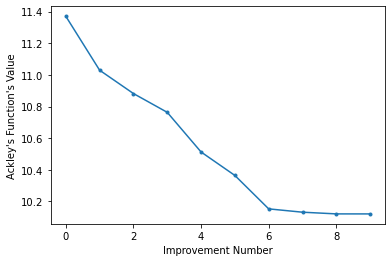

In [8]:
pyplot.plot(scores, '.-')
pyplot.xlabel("Improvement Number")
pyplot.ylabel("Ackley's Function's Value")